# Логистическая регрессия

Студент: Белянинов Илья Витальевич\
Группа: ПМ22-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [2]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


In [4]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  2.33019532,  4.72180951],
       [ 1.        , -2.01084076,  1.42633933],
       [ 1.        , -2.00873243,  2.24540194]])

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X, y)
y_pred_lr  = model.predict(X)
y_pred_lr

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [7]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

In [8]:
Z  = model.predict(XX)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

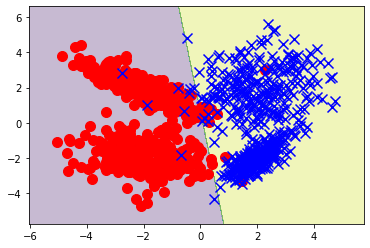

In [9]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [11]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        errors = []
        steps = []
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
            errors.append(sum(abs(b_grad)))
            steps.append(i)
        return b, steps, errors
    
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b, steps, errors  = self.optimize(X, y, start_b, self._n_iters)
        return steps, errors
    
    
class LogReg(SGD):
    
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [12]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [13]:
logreg = LogReg()

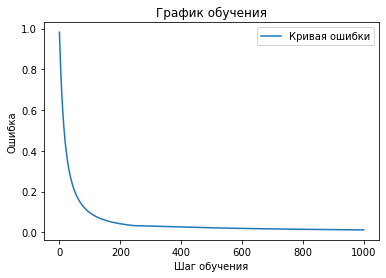

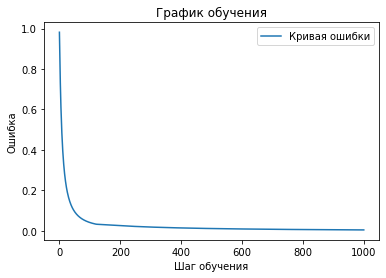

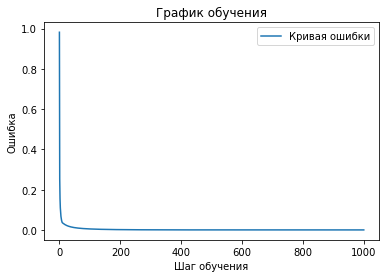

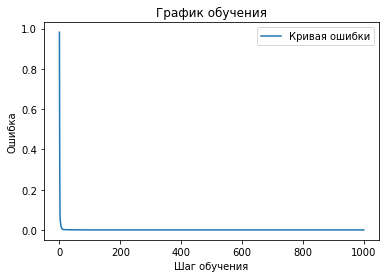

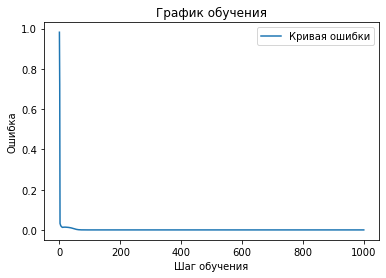

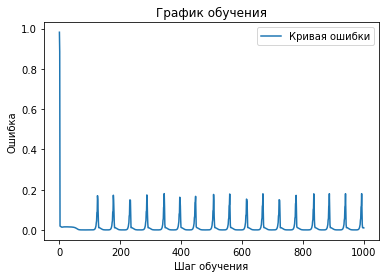

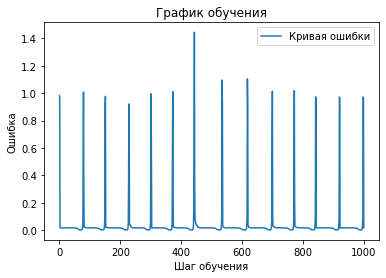

In [14]:
for alpha in [0.05, 0.1, 1, 5, 15, 30, 50]:
    
    logreg = LogReg(alpha = alpha)
    steps, errors = logreg.fit(X, y)

    plt.plot(errors,label = 'Кривая ошибки')
    plt.xlabel("Шаг обучения")
    plt.ylabel("Ошибка")
    plt.title('График обучения')
    plt.legend()
    plt.show()

### 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

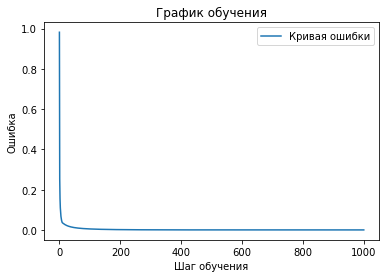

Точность = 0.978


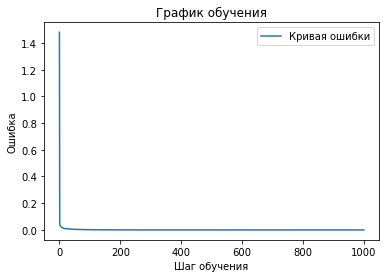

Точность = 0.995


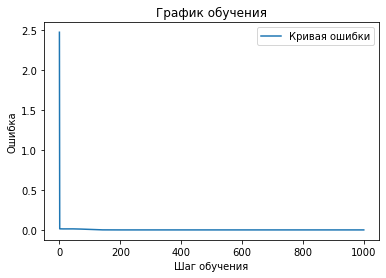

Точность = 0.997


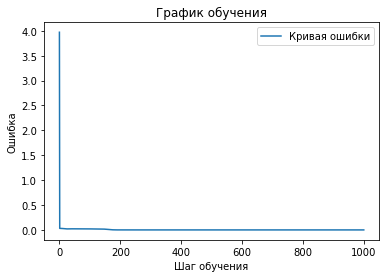

Точность = 0.997


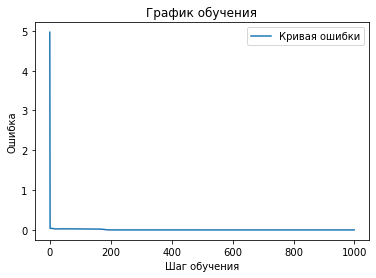

Точность = 0.997


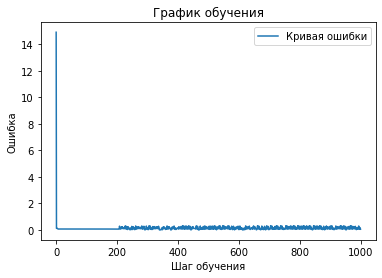

Точность = 0.997


C:\Users\Елена\AppData\Local\Temp\ipykernel_14208\2455069677.py:32: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


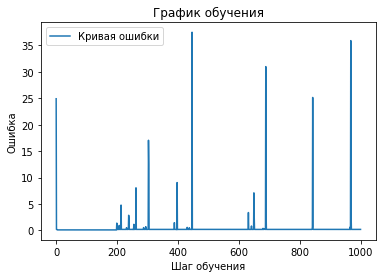

Точность = 0.996


In [15]:
for class_sep in [2, 3, 5, 8, 10, 30, 50]:
    X,y = make_classification (n_samples=1000,
                              n_features=2,
                              n_informative=2,
                              n_redundant=0,
                              n_classes=2,
                              class_sep=class_sep,
                              random_state=1)
    logreg = LogReg(alpha = 1)
    steps, errors = logreg.fit(X, y)
    y_pred = logreg.predict(X)
    
    plt.plot(errors,label = 'Кривая ошибки')
    plt.xlabel("Шаг обучения")
    plt.ylabel("Ошибка")
    plt.title('График обучения')
    plt.legend()
    plt.show()
    print(f'Точность = {accuracy_score(y, y_pred)}')

С увеличением значения class_sep точность модели увеличивается, но, до момента, когда происходит переобучение модели.

### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [15]:
X,y = make_classification (n_samples=1000,
                          n_features=200,
                          n_informative=200,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,9.390875,-6.323124,16.373549,-4.489891,4.747534,-6.091861,-2.338323,0.760100,0.856550,-9.149062,...,-7.551905,-9.705675,9.162194,4.014039,1.030634,0.777012,1.134542,-4.492414,1.076788,-4.819221
1,14.204164,-6.527910,2.540911,-10.930518,-1.875654,1.021721,13.298605,-0.559639,4.828799,-3.126968,...,0.205820,14.679065,-9.465476,5.969824,9.594228,10.581467,-0.010909,-24.336679,6.576546,-4.785668
2,-6.060744,-19.162286,-6.775135,-9.063918,2.832218,-3.160983,0.558118,-2.947624,-5.226577,-21.179933,...,3.989928,1.890547,15.908686,-9.544188,17.530448,0.186408,15.394389,16.232565,0.917842,12.835780
3,-5.690673,-17.980300,6.856936,-3.420968,-5.192882,-6.956826,-7.895819,0.323274,9.295333,4.600501,...,12.990137,9.533290,1.343368,11.008098,-12.293988,15.857045,17.567659,-11.325117,6.923685,2.491003
4,0.850140,-22.942387,1.979677,5.950008,8.670350,-4.467532,1.883212,-2.183149,-1.887194,2.147798,...,-2.319775,-2.094695,5.408296,-0.649235,-7.233088,10.910417,-28.465124,0.134948,5.834505,0.269879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.186255,13.359516,6.722640,-7.680799,0.371259,-6.224236,-7.331281,9.019834,-4.742297,3.339033,...,3.124672,-6.167163,-6.223397,10.929264,-1.941636,2.916759,8.582874,-16.394895,-1.115595,-0.891513
996,1.166684,4.051069,-8.184762,13.854858,-5.698615,-0.918758,4.168466,-0.690600,5.651349,1.909686,...,-0.252033,20.704356,5.678696,-3.750399,-8.298539,14.223827,-2.811282,-7.273317,10.670682,31.172234
997,-4.861648,16.626146,3.744463,4.054743,-13.491836,-12.999623,-4.622614,-12.049941,0.595088,-2.410202,...,-4.418839,2.501792,4.885549,7.623006,-8.185303,-4.256630,-5.231507,-3.649857,4.405186,2.752383
998,10.238669,10.714014,7.624998,11.301751,0.035351,0.692156,16.342573,1.581062,5.670492,-3.921452,...,4.076377,5.163266,10.895806,5.811456,14.185631,4.672526,-7.444037,-6.704466,-11.200679,9.136930


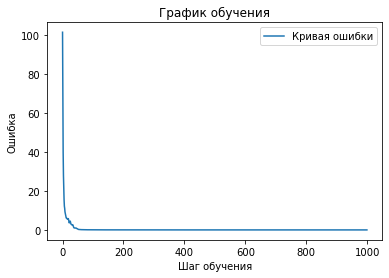

In [16]:
logreg_big = LogReg()
steps, errors = logreg_big.fit(X, y)

plt.plot(errors,label = 'Кривая ошибки')
plt.xlabel("Шаг обучения")
plt.ylabel("Ошибка")
plt.title('График обучения')
plt.legend()
plt.show()

### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_classification (n_samples=1000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=8,
                          class_sep=2,
                          random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

models = {}
for class_label in set(y):
    y_binary = (y_train == class_label).astype(int)
    model = LogisticRegression(multi_class='ovr')
    model.fit(X_train, y_binary)
    models[class_label] = model
    
predictions = []

for i in range(len(X_test)):
    probs = [model.predict_proba(X_test[i].reshape(1, -1))[:, 1] for model in models.values()]
    predicted_class = max(models, key=lambda x: probs[x])
    predictions.append(predicted_class)  
    
print(f"Accuracy : {accuracy_score(y_test, predictions)}")

Accuracy : 0.8666666666666667


In [125]:
X_test[3].reshape(1,-1)

array([[ 1.53725781, -1.50641811, -3.47598263, -2.0552051 ]])

In [109]:
list(models.values())[2].predict_proba(X_test[0].reshape(1, -1))[:, 1]

array([0.97967612])

In [94]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
   
model = OneVsRestClassifier(SVC()) 
   
model.fit(X_train, y_train) 
   
prediction = model.predict(X_test) 
   
print(f"Accuracy : {accuracy_score(y_test, prediction)}")

Accuracy : 0.9133333333333333


### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [47]:
from sklearn.linear_model import LogisticRegression

X,y = make_classification (n_samples=1000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=2,
                          random_state=0)

logr = LogisticRegression() 
logr.fit(X, y)

A = logr.predict_proba([X[0,:]])
print(A)

[[0.03619509 0.06706436 0.01549378 0.88124677]]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X,y = make_classification (n_samples=1000,
                          n_features=4,
                          n_informative=4,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=2,
                          random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)


logr = LogisticRegression() 
logr.fit(X_train, y_train)

A = logr.predict_proba([X_test[0,:]])
print(A)

[[0.0454623  0.06778136 0.01655356 0.87020277]]
